# LDA Model Training

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

## Data

In [2]:
data_file_path='DATA.csv'
data=pd.read_csv(data_file_path)
data

,PeakID,Distance to TSS,motif_string
0,seq_40800,-81,"motif_149,motif_162,motif_166,motif_166,motif_..."
1,seq_10314,-228,motif_144
2,seq_18866,9616,"motif_104,motif_126,motif_126,motif_147,motif_..."
3,seq_45348,5770,"motif_120,motif_121,motif_128,motif_128,motif_..."
4,seq_2616,-12540,"motif_100,motif_103,motif_126,motif_126,motif_..."
...,...,...,...
60095,seq_5507,-127293,"motif_137,motif_137,motif_13,motif_174,motif_1..."
60096,seq_11070,37721,"motif_132,motif_132,motif_132,motif_142,motif_..."
60097,seq_17945,88589,"motif_161,motif_162,motif_162,motif_174,motif_..."
60098,seq_29137,93216,"motif_104,motif_105,motif_117,motif_117,motif_..."


In [3]:
print(data[data['motif_string'].isna()])
data.dropna(subset=['motif_string'],inplace=True)
data['motif_list']=data['motif_string'].apply(lambda x:x.split(','))
data

          PeakID  Distance to TSS motif_string
18840  seq_57232             -180          NaN
23892  seq_20216             -147          NaN
29667  seq_31231              483          NaN
46832   seq_8465             -341          NaN
47219  seq_46451             4737          NaN


,PeakID,Distance to TSS,motif_string,motif_list
0,seq_40800,-81,"motif_149,motif_162,motif_166,motif_166,motif_...","[motif_149, motif_162, motif_166, motif_166, m..."
1,seq_10314,-228,motif_144,[motif_144]
2,seq_18866,9616,"motif_104,motif_126,motif_126,motif_147,motif_...","[motif_104, motif_126, motif_126, motif_147, m..."
3,seq_45348,5770,"motif_120,motif_121,motif_128,motif_128,motif_...","[motif_120, motif_121, motif_128, motif_128, m..."
4,seq_2616,-12540,"motif_100,motif_103,motif_126,motif_126,motif_...","[motif_100, motif_103, motif_126, motif_126, m..."
...,...,...,...,...
60095,seq_5507,-127293,"motif_137,motif_137,motif_13,motif_174,motif_1...","[motif_137, motif_137, motif_13, motif_174, mo..."
60096,seq_11070,37721,"motif_132,motif_132,motif_132,motif_142,motif_...","[motif_132, motif_132, motif_132, motif_142, m..."
60097,seq_17945,88589,"motif_161,motif_162,motif_162,motif_174,motif_...","[motif_161, motif_162, motif_162, motif_174, m..."
60098,seq_29137,93216,"motif_104,motif_105,motif_117,motif_117,motif_...","[motif_104, motif_105, motif_117, motif_117, m..."


In [4]:
from gensim.corpora import Dictionary

docs=data['motif_list'].values
dictionary=Dictionary(docs)

print('Motif-Index to Motif-Name Mapping:')
for i,v in dictionary.items():
    print(f'{i} - {v}')
    if i==10:
        break
    

Motif-Index to Motif-Name Mapping:
0 - motif_149
1 - motif_162
2 - motif_166
3 - motif_174
4 - motif_199
5 - motif_230
6 - motif_248
7 - motif_295
8 - motif_60
9 - motif_66
10 - motif_98


In [5]:
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('BOW (Sequence-0):')
docs[0],corpus[0]

BOW (Sequence-0):


(['motif_149',
  'motif_162',
  'motif_166',
  'motif_166',
  'motif_174',
  'motif_199',
  'motif_230',
  'motif_248',
  'motif_295',
  'motif_295',
  'motif_60',
  'motif_60',
  'motif_66',
  'motif_98'],
 [(0, 1),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 2),
  (9, 1),
  (10, 1)])

## Training Test

In [6]:
%%time
import logging
from gensim.models.callbacks import Callback,PerplexityMetric, ConvergenceMetric, CoherenceMetric

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.DEBUG)
convergence_logger = ConvergenceMetric(logger='shell')
from gensim.models import LdaModel,LdaMulticore

temp = dictionary[0]
id2word = dictionary.id2token
lda = LdaModel(corpus, id2word=id2word, alpha='auto',chunksize=10000,
               eta='auto',num_topics=3, iterations=1000, passes = 5,
              minimum_probability=0.0,callbacks=[convergence_logger])

lda_predictions=lda.get_document_topics(corpus,minimum_probability=0.0)
lda_pred_topic=[]
for pred in tqdm(lda_predictions):
    top_topic=sorted(pred,key=lambda x:-x[1])[0][0]
    lda_pred_topic.append(top_topic)
lda_pred_data=data.copy()
lda_pred_data['pred_topic']=lda_pred_topic

logging.getLogger().setLevel(logging.CRITICAL)

2021-02-24 12:32:44,044 : INFO : using autotuned alpha, starting with [0.33333334, 0.33333334, 0.33333334]
2021-02-24 12:32:44,045 : INFO : using serial LDA version on this node
2021-02-24 12:32:44,047 : INFO : running online (multi-pass) LDA training, 3 topics, 5 passes over the supplied corpus of 60095 documents, updating model once every 10000 documents, evaluating perplexity every 60095 documents, iterating 1000x with a convergence threshold of 0.001000
2021-02-24 12:32:44,050 : INFO : PROGRESS: pass 0, at document #10000/60095
2021-02-24 12:32:44,051 : DEBUG : performing inference on a chunk of 10000 documents
2021-02-24 12:33:06,206 : DEBUG : 9827/10000 documents converged within 1000 iterations
2021-02-24 12:33:06,236 : INFO : optimized alpha [0.08902334, 0.081018746, 0.16586225]
2021-02-24 12:33:06,237 : DEBUG : updating topics
2021-02-24 12:33:06,237 : INFO : merging changes from 10000 documents into a model of 60095 documents
2021-02-24 12:33:06,238 : INFO : topic #0 (0.089):

2021-02-24 12:33:27,186 : DEBUG : bound: at document #0
2021-02-24 12:33:27,223 : INFO : -5.081 per-word bound, 33.9 perplexity estimate based on a held-out corpus of 95 documents with 2924 words
2021-02-24 12:33:27,224 : INFO : PROGRESS: pass 0, at document #60095/60095
2021-02-24 12:33:27,224 : DEBUG : performing inference on a chunk of 95 documents
2021-02-24 12:33:27,249 : DEBUG : 95/95 documents converged within 1000 iterations
2021-02-24 12:33:27,249 : INFO : optimized alpha [0.0945066, 0.08372216, 0.04379249]
2021-02-24 12:33:27,250 : DEBUG : updating topics
2021-02-24 12:33:27,250 : INFO : merging changes from 95 documents into a model of 60095 documents
2021-02-24 12:33:27,252 : INFO : topic #0 (0.095): 0.027*"motif_60" + 0.024*"motif_62" + 0.018*"motif_126" + 0.018*"motif_84" + 0.016*"motif_54" + 0.015*"motif_93" + 0.013*"motif_2" + 0.013*"motif_1" + 0.013*"motif_121" + 0.012*"motif_86"
2021-02-24 12:33:27,252 : INFO : topic #1 (0.084): 0.048*"motif_60" + 0.035*"motif_37" + 0

2021-02-24 12:33:42,868 : DEBUG : updating topics
2021-02-24 12:33:42,868 : INFO : merging changes from 10000 documents into a model of 60095 documents
2021-02-24 12:33:42,870 : INFO : topic #0 (0.119): 0.029*"motif_60" + 0.025*"motif_62" + 0.022*"motif_126" + 0.021*"motif_84" + 0.018*"motif_54" + 0.015*"motif_17" + 0.014*"motif_121" + 0.014*"motif_93" + 0.014*"motif_31" + 0.014*"motif_86"
2021-02-24 12:33:42,870 : INFO : topic #1 (0.113): 0.051*"motif_60" + 0.035*"motif_37" + 0.033*"motif_184" + 0.033*"motif_23" + 0.031*"motif_42" + 0.027*"motif_218" + 0.025*"motif_40" + 0.025*"motif_13" + 0.023*"motif_19" + 0.021*"motif_166"
2021-02-24 12:33:42,871 : INFO : topic #2 (0.038): 0.043*"motif_219" + 0.042*"motif_11" + 0.041*"motif_12" + 0.040*"motif_10" + 0.036*"motif_6" + 0.036*"motif_9" + 0.034*"motif_5" + 0.032*"motif_8" + 0.031*"motif_264" + 0.028*"motif_4"
2021-02-24 12:33:42,872 : INFO : topic diff=0.073180, rho=0.353344
2021-02-24 12:33:42,873 : DEBUG : bound: at document #0
2021-0

2021-02-24 12:33:54,744 : INFO : topic #1 (0.147): 0.052*"motif_60" + 0.036*"motif_184" + 0.035*"motif_37" + 0.032*"motif_23" + 0.031*"motif_42" + 0.029*"motif_218" + 0.025*"motif_40" + 0.025*"motif_13" + 0.022*"motif_19" + 0.021*"motif_166"
2021-02-24 12:33:54,745 : INFO : topic #2 (0.039): 0.052*"motif_219" + 0.046*"motif_11" + 0.046*"motif_12" + 0.044*"motif_10" + 0.039*"motif_6" + 0.039*"motif_9" + 0.037*"motif_5" + 0.037*"motif_264" + 0.035*"motif_8" + 0.030*"motif_4"
2021-02-24 12:33:54,745 : INFO : topic diff=0.069256, rho=0.333158
2021-02-24 12:33:54,747 : INFO : PROGRESS: pass 2, at document #60000/60095
2021-02-24 12:33:54,747 : DEBUG : performing inference on a chunk of 10000 documents
2021-02-24 12:33:56,810 : DEBUG : 10000/10000 documents converged within 1000 iterations
2021-02-24 12:33:56,837 : INFO : optimized alpha [0.15484232, 0.15223075, 0.038841385]
2021-02-24 12:33:56,837 : DEBUG : updating topics
2021-02-24 12:33:56,838 : INFO : merging changes from 10000 document

2021-02-24 12:34:04,985 : INFO : topic diff=0.059576, rho=0.316078
2021-02-24 12:34:04,987 : INFO : PROGRESS: pass 3, at document #50000/60095
2021-02-24 12:34:04,988 : DEBUG : performing inference on a chunk of 10000 documents
2021-02-24 12:34:07,154 : DEBUG : 10000/10000 documents converged within 1000 iterations
2021-02-24 12:34:07,183 : INFO : optimized alpha [0.1823466, 0.18310863, 0.04088225]
2021-02-24 12:34:07,183 : DEBUG : updating topics
2021-02-24 12:34:07,184 : INFO : merging changes from 10000 documents into a model of 60095 documents
2021-02-24 12:34:07,185 : INFO : topic #0 (0.182): 0.028*"motif_60" + 0.026*"motif_62" + 0.023*"motif_126" + 0.021*"motif_84" + 0.019*"motif_54" + 0.016*"motif_17" + 0.015*"motif_121" + 0.015*"motif_31" + 0.014*"motif_93" + 0.014*"motif_26"
2021-02-24 12:34:07,185 : INFO : topic #1 (0.183): 0.052*"motif_60" + 0.038*"motif_184" + 0.035*"motif_37" + 0.032*"motif_23" + 0.031*"motif_42" + 0.030*"motif_218" + 0.025*"motif_40" + 0.025*"motif_13" + 

2021-02-24 12:34:18,022 : INFO : optimized alpha [0.20428933, 0.20804074, 0.04337095]
2021-02-24 12:34:18,022 : DEBUG : updating topics
2021-02-24 12:34:18,023 : INFO : merging changes from 10000 documents into a model of 60095 documents
2021-02-24 12:34:18,025 : INFO : topic #0 (0.204): 0.027*"motif_60" + 0.026*"motif_62" + 0.022*"motif_126" + 0.020*"motif_84" + 0.019*"motif_54" + 0.015*"motif_17" + 0.015*"motif_93" + 0.015*"motif_31" + 0.014*"motif_121" + 0.014*"motif_26"
2021-02-24 12:34:18,026 : INFO : topic #1 (0.208): 0.053*"motif_60" + 0.039*"motif_184" + 0.035*"motif_37" + 0.032*"motif_23" + 0.031*"motif_218" + 0.030*"motif_42" + 0.025*"motif_40" + 0.024*"motif_13" + 0.022*"motif_166" + 0.021*"motif_19"
2021-02-24 12:34:18,027 : INFO : topic #2 (0.043): 0.061*"motif_219" + 0.051*"motif_11" + 0.050*"motif_12" + 0.048*"motif_10" + 0.044*"motif_9" + 0.043*"motif_6" + 0.042*"motif_264" + 0.040*"motif_5" + 0.039*"motif_8" + 0.033*"motif_4"
2021-02-24 12:34:18,027 : INFO : topic diff

CPU times: user 1min 56s, sys: 1.1 s, total: 1min 57s
Wall time: 1min 56s


## Model Evaluation Metrics

In [7]:
def getTopicDistribution(pred_data,ntopics):
    topic_dist_dict={i:0 for i in range(ntopics)}
    value_count=pred_data['pred_topic'].value_counts(normalize=True)
    for k,v in value_count.to_dict().items():
        topic_dist_dict[k]=v
    return topic_dist_dict

def likelihoodMetric(model,pred_data,dictionary,ntopics):
    likelihood=0
    P_T=getTopicDistribution(pred_data,ntopics)
    print(P_T)
    for idx,row in tqdm(pred_data.iterrows()):
        motif_list=dictionary.doc2idx(row['motif_list'])
        assigned_topic_no=row['pred_topic']
        P_Xi_M=0
        for topic_no in range(ntopics):
            ttd=model.get_topic_terms(topic_no)
            filtered_ttd=list(filter(lambda x:x[0] in motif_list,ttd))
            P_X_Ti=1
            for motif,P_mj_T in filtered_ttd:
                P_X_Ti*=P_mj_T
            P_Xi_M+=P_X_Ti*P_T[topic_no]
        likelihood+=np.log10(P_Xi_M)
    print(likelihood)
    return likelihood
likelihoodMetric(lda,lda_pred_data,dictionary,3)

157it [00:00, 1567.92it/s]

{0: 0.43632581745569515, 1: 0.4714868125468009, 2: 0.09218736999750395}


60095it [00:27, 2164.96it/s]

-56346.589253135695


-56346.589253135695

In [8]:
# def getTopicDistribution(pred_data,ntopics):
#     value_count=pred_data['pred_topic'].value_counts(normalize=True)
#     topic_dist_dict=value_count.to_dict()
#     return topic_dist_dict

# def likelihoodMetric(pred_data,predictions,ntopics):
#     likelihood=0
#     P_T=getTopicDistribution(pred_data,ntopics)
#     for pred in tqdm(predictions):
#         P_Xi_M=0
#         for topic_no,P_Xi_T in pred:
#             P_Xi_M+=P_Xi_T*P_T[topic_no]
#         likelihood+=np.log10(P_Xi_M)
#     print(likelihood)
#     return likelihood
# # likelihoodMetric(lda_pred_data,lda_predictions,3)

In [9]:
from gensim.models.coherencemodel import CoherenceModel

def coherenceMetric_cv(model,dictionary,docs):
    cm=CoherenceModel(model=model,dictionary=dictionary ,
                      texts=docs, coherence='c_v',processes=30)
    coherence = cm.get_coherence()
    print(coherence)
    return coherence
# coherenceMetric_cv(lda,dictionary ,docs)

In [10]:
from gensim.models.coherencemodel import CoherenceModel

def coherenceMetric_umass(model,dictionary,corpus):
    cm = CoherenceModel(model=model, corpus=corpus, \
                        coherence='u_mass',processes=30)
    coherence = cm.get_coherence()
    print(coherence)
    return coherence
# coherenceMetric_umass(lda,dictionary ,corpus)

In [11]:
from gensim.models.coherencemodel import CoherenceModel

def coherenceMetric_uci(model,dictionary,docs):
    cm=CoherenceModel(model=model,dictionary=dictionary ,
                      texts=docs, coherence='c_uci',processes=30,
                     window_size =2000)
    coherence = cm.get_coherence()
    print(coherence)
    return coherence
# coherenceMetric_uci(lda,dictionary ,docs)

In [12]:
def perplexityMetric(model,corpus):
    perplexity=model.log_perplexity(corpus)
    print(perplexity)
    return perplexity
# perplexityMetric(lda,corpus)

In [13]:
from collections import Counter

def findTopMotifs(pred_data,ntopics,ntop=5,outdir=None):     
    gb=pred_data[['motif_string','pred_topic']].groupby('pred_topic').\
    agg(lambda x: ','.join(x))
    gb['top_motif']=gb['motif_string'].\
    apply(lambda x:Counter(x.split(',')).most_common(ntop))
    gb.reset_index(inplace=True)
    gb=gb[['pred_topic','top_motif']]
    if outdir is not None:
        gb.to_csv(f'{outdir}/top{ntop}_motifs_topics_{ntopics}.csv',index=False)
    print(gb)
    return gb
# findTopMotifs(lda_pred_data,3)

In [14]:
def getAvgTssDist(pred_data,ntopics,outdir=None):
#     pred_topic=[]
#     for pred in tqdm(predictions):
#         top_topic=sorted(pred,key=lambda x:-x[1])[0][0]
#         pred_topic.append(top_topic)
#     _data=data.copy()
#     _data['pred_topic']=pred_topic
    gb=pred_data[['Distance to TSS','pred_topic']].groupby('pred_topic').mean()
    gb.reset_index(inplace=True)
    if outdir is not None:
        gb.to_csv(f'{outdir}/avg_tss_dist_topics_{ntopics}.csv',index=False)
    print(gb)
    return gb
# getAvgTssDist(lda_pred_data,3)

## Training & Evaluation

In [15]:
%%time

from gensim.models import LdaModel,LdaMulticore

outdir='model_output'
eval_dict={'num_topics':[],'likelihood':[],'coherence_cv':[],\
          'coherence_umass':[],'coherence_uci':[],'perplexity':[]}
temp = dictionary[0]
id2word = dictionary.id2token
for ntopics in range(2,10):
    print('\n'+'='*40)
    print('Num of Topics = '+str(ntopics))
    model = LdaModel(corpus, id2word=id2word, alpha='auto',chunksize=10000,
                   eta='auto',num_topics=ntopics, iterations=1000, passes = 5,
                  minimum_probability=0.0)
    
    predictions=model.get_document_topics(corpus,minimum_probability=0.0)
    pred_topic=[]
    for pred in tqdm(predictions):
        top_topic=sorted(pred,key=lambda x:-x[1])[0][0]
        pred_topic.append(top_topic)
    pred_data=data.copy()
    pred_data['pred_topic']=pred_topic
    print('\nFinding likelihood...')
#     likelihood=likelihoodMetric(pred_data,predictions,ntopics)
    likelihood=likelihoodMetric(model,pred_data,dictionary,ntopics)
    print('\nFinding coherence_cv...')
    coherence_cv=coherenceMetric_cv(model,dictionary,docs)
    print('\nFinding coherence_umass...')
    coherence_umass=coherenceMetric_umass(model,dictionary ,corpus)
    print('\nFinding coherence_uci...')
    coherence_uci=coherenceMetric_uci(model,dictionary,docs)
    print('\nFinding perplexity...')
    perplexity=perplexityMetric(model,corpus)
    print('\nFinding Top Motifs...')
    findTopMotifs(pred_data,ntopics,outdir=outdir)
    print('\nFindng avg. distance from TSS per topic...')
    getAvgTssDist(pred_data,ntopics,outdir=outdir)
    eval_dict['num_topics'].append(ntopics)
    eval_dict['likelihood'].append(likelihood)
    eval_dict['coherence_cv'].append(coherence_cv)
    eval_dict['coherence_umass'].append(coherence_umass)
    eval_dict['coherence_uci'].append(coherence_uci)
    eval_dict['perplexity'].append(perplexity)
eval_df=pd.DataFrame(eval_dict)
eval_df.to_csv(f'{outdir}/metrics.csv',index=False)
eval_df


Num of Topics = 2


100%|██████████| 60095/60095 [00:17<00:00, 3424.66it/s]
250it [00:00, 2497.45it/s]


Finding likelihood...
{0: 0.5349862717364173, 1: 0.46501372826358267}


60095it [00:20, 2908.47it/s]

-122206.80656932936

Finding coherence_cv...


0.5334821022864392

Finding coherence_umass...
-1.598256008605613

Finding coherence_uci...
0.40211662099740747

Finding perplexity...
-5.098912979494928

Finding Top Motifs...
   pred_topic                                          top_motif
0           0  [(motif_60, 24819), (motif_62, 16709), (motif_...
1           1  [(motif_60, 43688), (motif_184, 29541), (motif...

Findng avg. distance from TSS per topic...
   pred_topic  Distance to TSS
0           0     13566.325972
1           1      6015.194525

Num of Topics = 3


100%|██████████| 60095/60095 [00:18<00:00, 3290.48it/s]
178it [00:00, 1777.63it/s]


Finding likelihood...
{0: 0.24191696480572428, 1: 0.440519177968217, 2: 0.31756385722605873}


60095it [00:34, 1742.72it/s]


-55112.058259756304

Finding coherence_cv...
0.6902576133873568

Finding coherence_umass...
-1.3980171924383198

Finding coherence_uci...
0.7072157039867171

Finding perplexity...
-4.963667029719087

Finding Top Motifs...
   pred_topic                                          top_motif
0           0  [(motif_60, 36606), (motif_184, 26612), (motif...
1           1  [(motif_60, 20948), (motif_62, 15234), (motif_...
2           2  [(motif_37, 22248), (motif_23, 20718), (motif_...

Findng avg. distance from TSS per topic...
   pred_topic  Distance to TSS
0           0      8405.107924
1           1     14676.913837
2           2      4900.261580

Num of Topics = 4


100%|██████████| 60095/60095 [00:22<00:00, 2716.43it/s]
88it [00:00, 874.33it/s]


Finding likelihood...
{0: 0.4154754971295449, 1: 0.13305599467509777, 2: 0.22544304850653132, 3: 0.22602545968882604}


60095it [00:39, 1504.77it/s]

-38987.21783912795

Finding coherence_cv...


0.5946756924650776

Finding coherence_umass...
-1.5983506282200202

Finding coherence_uci...
0.5505781481912936

Finding perplexity...
-4.901448440125179

Finding Top Motifs...
   pred_topic                                          top_motif
0           0  [(motif_60, 20974), (motif_126, 12065), (motif...
1           1  [(motif_54, 6444), (motif_41, 5830), (motif_48...
2           2  [(motif_37, 19965), (motif_23, 18637), (motif_...
3           3  [(motif_60, 34684), (motif_184, 24351), (motif...

Findng avg. distance from TSS per topic...
   pred_topic  Distance to TSS
0           0     14327.649151
1           1     10258.880065
2           2      2984.306023
3           3      9133.318413

Num of Topics = 5


100%|██████████| 60095/60095 [00:19<00:00, 3153.15it/s]
140it [00:00, 1396.05it/s]


Finding likelihood...
{0: 0.1903486146934021, 1: 0.186371578334304, 2: 0.26240119810300355, 3: 0.10679757051335385, 4: 0.25408103835593643}


60095it [00:37, 1597.87it/s]

-34609.88636204785

Finding coherence_cv...


0.6461034558348699

Finding coherence_umass...
-1.500367262102756

Finding coherence_uci...
0.6864537450005528

Finding perplexity...
-4.860747754451451

Finding Top Motifs...
   pred_topic                                          top_motif
0           0  [(motif_60, 30848), (motif_184, 23337), (motif...
1           1  [(motif_60, 7868), (motif_17, 6230), (motif_62...
2           2  [(motif_37, 20847), (motif_23, 19423), (motif_...
3           3  [(motif_11, 8613), (motif_12, 8370), (motif_10...
4           4  [(motif_60, 15366), (motif_126, 6997), (motif_...

Findng avg. distance from TSS per topic...
   pred_topic  Distance to TSS
0           0      7051.670251
1           1     15927.064196
2           2      3717.180417
3           3     16847.193518
4           4     11687.950095

Num of Topics = 6


100%|██████████| 60095/60095 [00:19<00:00, 3140.00it/s]
102it [00:00, 1014.06it/s]


Finding likelihood...
{0: 0.15126050420168066, 1: 0.08621349529910974, 2: 0.18384224977119562, 3: 0.18392545136866628, 4: 0.20108162076711872, 5: 0.19367667859222898}


60095it [00:48, 1250.97it/s]

-25963.635007100645

Finding coherence_cv...


0.6490260445774294

Finding coherence_umass...
-1.6075359101105107

Finding coherence_uci...
0.687767750319011

Finding perplexity...
-4.823758756106599

Finding Top Motifs...
   pred_topic                                          top_motif
0           0  [(motif_219, 8741), (motif_60, 7915), (motif_2...
1           1  [(motif_62, 3457), (motif_60, 3372), (motif_12...
2           2  [(motif_60, 33200), (motif_184, 23800), (motif...
3           3  [(motif_60, 9350), (motif_11, 9061), (motif_12...
4           4  [(motif_60, 8913), (motif_17, 5846), (motif_31...
5           5  [(motif_37, 19209), (motif_23, 17922), (motif_...

Findng avg. distance from TSS per topic...
   pred_topic  Distance to TSS
0           0     10507.653135
1           1     14516.180467
2           2      7948.604906
3           3     12410.898399
4           4     14177.099057
5           5      3197.798866

Num of Topics = 7


100%|██████████| 60095/60095 [00:18<00:00, 3209.31it/s]
104it [00:00, 1033.70it/s]


Finding likelihood...
{0: 0.1749563191613279, 1: 0.20913553540227972, 2: 0.05845744238289375, 3: 0.2523670854480406, 4: 0.09955903153340544, 5: 0.1505449704634329, 6: 0.054979615608619685}


60095it [00:51, 1171.39it/s]

-23105.61248037795

Finding coherence_cv...


0.6645737128861938

Finding coherence_umass...
-1.5037129573544792

Finding coherence_uci...
0.7687222246679515

Finding perplexity...
-4.757601908013544

Finding Top Motifs...
   pred_topic                                          top_motif
0           0  [(motif_60, 31784), (motif_184, 23480), (motif...
1           1  [(motif_37, 19609), (motif_23, 18232), (motif_...
2           2  [(motif_11, 7910), (motif_12, 7730), (motif_10...
3           3  [(motif_60, 14148), (motif_126, 9742), (motif_...
4           4  [(motif_41, 5907), (motif_48, 5899), (motif_49...
5           5  [(motif_54, 8337), (motif_62, 6990), (motif_12...
6           6  [(motif_175, 2530), (motif_147, 2298), (motif_...

Findng avg. distance from TSS per topic...
   pred_topic  Distance to TSS
0           0      8092.800647
1           1      3190.453135
2           2     13205.470538
3           3     14040.602268
4           4      6996.582651
5           5     16988.682326
6           6      7318.073547

Num of Top

100%|██████████| 60095/60095 [00:19<00:00, 3053.60it/s]
83it [00:00, 823.76it/s]


Finding likelihood...
{0: 0.24496214327315086, 1: 0.17174473749896, 2: 0.077943256510525, 3: 0.1412263915467177, 4: 0.07995673516931526, 5: 0.08175388967468175, 6: 0.0902238122971961, 7: 0.11218903402945336}


60095it [01:04, 932.06it/s] 

-19761.368320243397

Finding coherence_cv...


0.6820292393079928

Finding coherence_umass...
-1.6411356672497726

Finding coherence_uci...
0.8404027637600673

Finding perplexity...
-4.713399039540757

Finding Top Motifs...
   pred_topic                                          top_motif
0           0  [(motif_60, 14999), (motif_126, 9563), (motif_...
1           1  [(motif_60, 31301), (motif_184, 23373), (motif...
2           2  [(motif_41, 5489), (motif_48, 5487), (motif_49...
3           3  [(motif_37, 17046), (motif_23, 15859), (motif_...
4           4  [(motif_17, 4338), (motif_26, 3904), (motif_31...
5           5  [(motif_248, 3995), (motif_167, 3586), (motif_...
6           6  [(motif_54, 7669), (motif_122, 6197), (motif_9...
7           7  [(motif_11, 8330), (motif_12, 8142), (motif_10...

Findng avg. distance from TSS per topic...
   pred_topic  Distance to TSS
0           0     13878.744922
1           1      8339.221587
2           2      5253.158839
3           3      2507.775421
4           4     15221.588970
5       

100%|██████████| 60095/60095 [00:17<00:00, 3357.48it/s]
83it [00:00, 829.53it/s]


Finding likelihood...
{0: 0.15941426075380646, 1: 0.07945752558449122, 2: 0.06491388634661785, 3: 0.16831683168316833, 4: 0.0783759048173725, 5: 0.059588984108494884, 6: 0.10473417089608121, 7: 0.042216490556618684, 8: 0.24298194525334887}


60095it [01:08, 874.38it/s] 

-18402.08843709904

Finding coherence_cv...


0.75452864641901

Finding coherence_umass...
-1.4872065636765726

Finding coherence_uci...
1.0449297036368281

Finding perplexity...
-4.643764006453906

Finding Top Motifs...
   pred_topic                                          top_motif
0           0  [(motif_60, 29519), (motif_184, 22151), (motif...
1           1  [(motif_41, 5515), (motif_48, 5515), (motif_49...
2           2  [(motif_175, 2581), (motif_147, 2304), (motif_...
3           3  [(motif_37, 18382), (motif_23, 17081), (motif_...
4           4  [(motif_17, 4348), (motif_26, 3936), (motif_31...
5           5  [(motif_11, 8039), (motif_12, 7840), (motif_10...
6           6  [(motif_54, 8261), (motif_122, 6509), (motif_8...
7           7  [(motif_219, 5892), (motif_264, 4959), (motif_...
8           8  [(motif_60, 15972), (motif_126, 8322), (motif_...

Findng avg. distance from TSS per topic...
   pred_topic  Distance to TSS
0           0      8463.277140
1           1      6244.496545
2           2      7802.244553
3      

,num_topics,likelihood,coherence_cv,coherence_umass,coherence_uci,perplexity
0,2,-122206.806569,0.533482,-1.598256,0.402117,-5.098913
1,3,-55112.058260,0.690258,-1.398017,0.707216,-4.963667
2,4,-38987.217839,0.594676,-1.598351,0.550578,-4.901448
3,5,-34609.886362,0.646103,-1.500367,0.686454,-4.860748
4,6,-25963.635007,0.649026,-1.607536,0.687768,-4.823759
5,7,-23105.612480,0.664574,-1.503713,0.768722,-4.757602
6,8,-19761.368320,0.682029,-1.641136,0.840403,-4.713399
7,9,-18402.088437,0.754529,-1.487207,1.044930,-4.643764


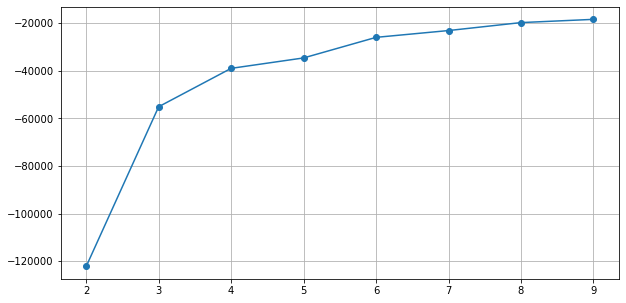

In [21]:
plt.figure(figsize=(10,5))
plt.plot(eval_df['num_topics'],eval_df['likelihood'],marker='o')
plt.grid()

In [16]:
# #setup logging for trainging metrics 
# import logging
# logging.basicConfig(filename='test_output/model_callbacks.log', filemode='w',
#                     format="%(asctime)s:%(levelname)s:%(message)s",
#                     level=logging.NOTSET)

# from gensim.models.callbacks import Callback,PerplexityMetric, ConvergenceMetric, CoherenceMetric
# perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell')
# convergence_logger = ConvergenceMetric(logger='shell')
# # coherence_cv_logger = CoherenceMetric(corpus=corpus, coherence = 'c_v', texts = docs)

# %%time
# from gensim.models import LdaModel,LdaMulticore

# #HYPERPARAMETERS
# #passes = epochs
# temp = dictionary[0]
# id2word = dictionary.id2token
# lda = LdaModel(corpus, id2word=id2word, alpha='auto',eval_every = 1,\
#                eta='auto',num_topics=3, iterations=5, passes = 10,
#               callbacks=[perplexity_logger,convergence_logger])

# lda.print_topics()

# %%time
# from gensim.models import LdaModel,LdaMulticore

# id2word = dictionary.id2token
# lda = LdaMulticore(corpus, id2word=id2word,eval_every = 1,\
#                eta='auto',num_topics=3, iterations=500, passes = 100)

# import pyLDAvis.gensim

# pyLDAvis.enable_notebook()
# pyLDAvis.gensim.prepare(lda, corpus, dictionary)